In [36]:
#Inspired by https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [37]:
all_crime_data=pd.read_csv("RPD__Part_I_Crime_2011_to_Present.csv")

In [38]:
all_crime_data.columns.values

array(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category',
       'Statute_Text', 'Statute_Description', 'Statute_CrimeCategory',
       'Statute_Attempted', 'Weapon_Description', 'Larceny_Type',
       'Location_Type', 'Geo_Beat', 'Geo_Section', 'Geo_Section_Num'],
      dtype=object)

In [39]:
all_crime_data.pdOccurredFrom_time=pd.to_datetime(all_crime_data.OccurredFrom_Timestamp)

In [40]:
all_crime_data.pdOccurredFrom_time.head(3)

0   2014-06-16 00:30:00
1   2017-06-17 12:00:00
2   2018-02-14 08:00:00
Name: OccurredFrom_Timestamp, dtype: datetime64[ns]

In [41]:
all_crime_data.OBJECTID.head(3)

0    1
1    2
2    3
Name: OBJECTID, dtype: int64

In [42]:
all_crime_data.shape

(78268, 40)

In [43]:
all_crime_data.index=pd.DatetimeIndex(all_crime_data.pdOccurredFrom_time)

Text(0,0.5,u'Number of crimes')

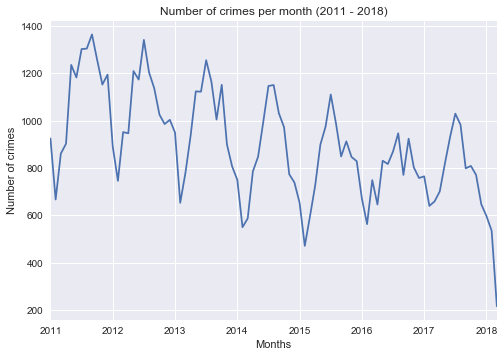

In [44]:
all_crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2011 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

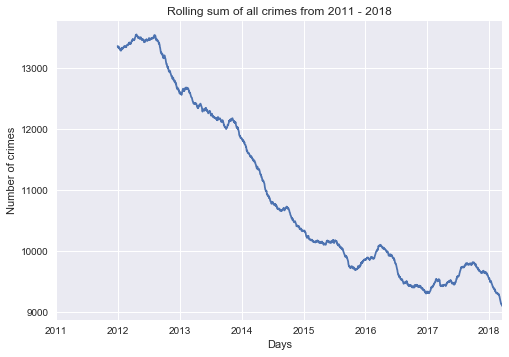

In [45]:
#The idea is, for each day, we calculate the sum of crimes of the past year. 
#If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year.
#On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.plt.show()
all_crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2011 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

In [46]:
crimes_count_date = all_crime_data.pivot_table('OBJECTID', aggfunc=np.size, columns='Statute_Text', index=all_crime_data.index.date, fill_value=0)

In [47]:
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

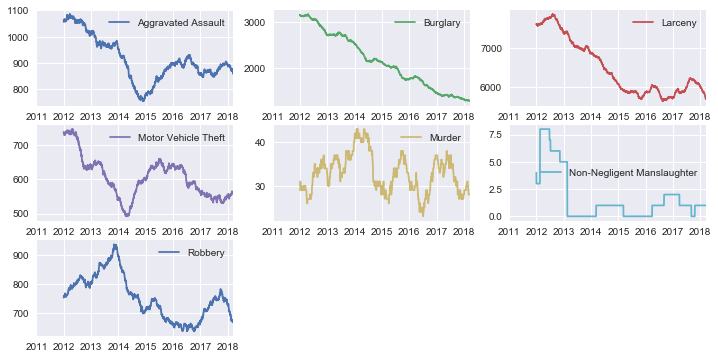

In [48]:
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 6), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

#looks like  Aggravated assault and Motor Vehicle theft dropped around 2013-2014 but bounced back a bit since then;
#Robbery on the other hind peaked around 2013-2014
#Burglary and Larceny droped throughout the years. Murder rate has been quite consistent throught the years.

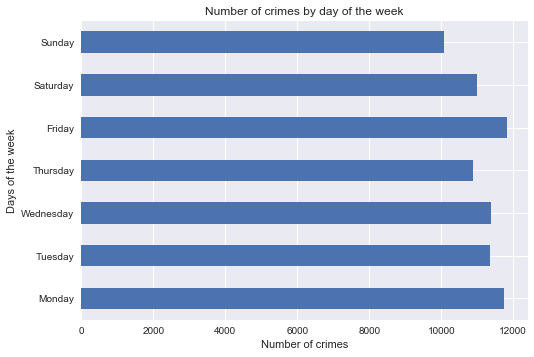

In [49]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
all_crime_data.groupby([all_crime_data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

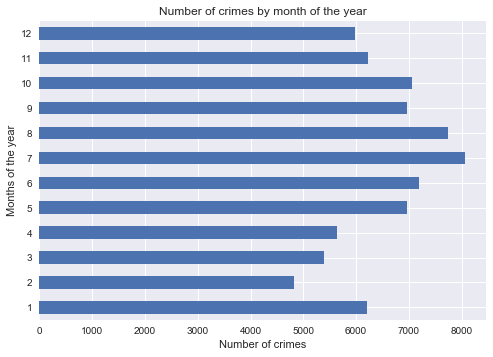

In [50]:
all_crime_data.groupby([all_crime_data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

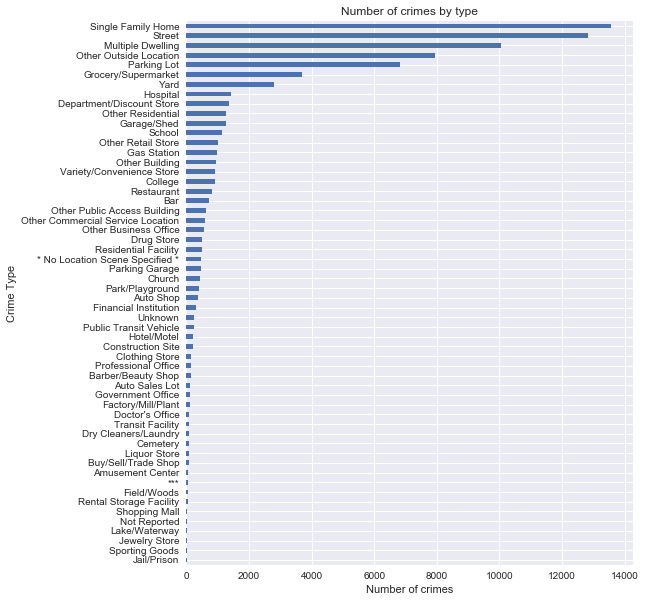

In [51]:
plt.figure(figsize=(8,10))
all_crime_data.groupby([all_crime_data['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [52]:
#Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. 

In [53]:
#After seeing the base rates of each crime location and type, 
#we will now assume that all crime types (and locations) have the same frequency or, 
#in other words, they are all equal overall. 
#We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

In [54]:
#Is theft or burglary is more likely to occur at a weekday compared to a weekend? 
#Are they more likely to happen in the morning vs evening or late night ? 
#Are they more likely to occur in a street vs a bar?

In [55]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [56]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [57]:
dayofweek_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns='Statute_Text', aggfunc=np.size).fillna(0)

In [58]:
from sklearn.cluster import AgglomerativeClustering as AC

In [59]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

In [60]:
def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

In [61]:
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

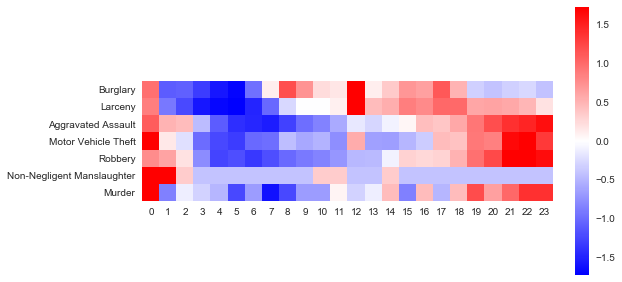

In [ ]:
scale_and_plot(hour_by_type)

In [ ]:
plt.figure(figsize=(40,15))
scale_and_plot(hour_by_location)

In [ ]:
plt.figure(figsize=(12,3))
scale_and_plot(dayofweek_by_type)

In [ ]:
plt.figure(figsize=(40,15))
scale_and_plot(dayofweek_by_location)

In [ ]:
#Where a certain crime type is most likely to happen?

In [ ]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()